In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as data
import yfinance as yf

In [ ]:
start = '2010-01-01'
end = '2024-07-05'

df = yf.download('BTC-USD', start ,end )

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-30,60888.445312,62892.828125,60632.949219,62678.292969,62678.292969,17333226409
2024-07-01,62673.605469,63777.226562,62495.511719,62851.980469,62851.980469,25468379421
2024-07-02,62844.410156,63203.359375,61752.746094,62029.015625,62029.015625,20151616992
2024-07-03,62034.332031,62187.703125,59419.386719,60173.921875,60173.921875,29756701685
2024-07-04,60147.136719,60399.675781,56777.804688,56977.703125,56977.703125,41149609230


In [ ]:
df.shape

(3579, 6)

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...
3574,3574,2024-06-30,60888.445312,62892.828125,60632.949219,62678.292969,62678.292969,17333226409
3575,3575,2024-07-01,62673.605469,63777.226562,62495.511719,62851.980469,62851.980469,25468379421
3576,3576,2024-07-02,62844.410156,63203.359375,61752.746094,62029.015625,62029.015625,20151616992
3577,3577,2024-07-03,62034.332031,62187.703125,59419.386719,60173.921875,60173.921875,29756701685


In [ ]:
df.drop(['Date' , 'Adj Close'], axis= 1, inplace  = True)

In [ ]:
df

,index,Open,High,Low,Close,Volume
0,0,465.864014,468.174011,452.421997,457.334015,21056800
1,1,456.859985,456.859985,413.104004,424.440002,34483200
2,2,424.102997,427.834991,384.532013,394.795990,37919700
3,3,394.673004,423.295990,389.882996,408.903992,36863600
4,4,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
3574,3574,60888.445312,62892.828125,60632.949219,62678.292969,17333226409
3575,3575,62673.605469,63777.226562,62495.511719,62851.980469,25468379421
3576,3576,62844.410156,63203.359375,61752.746094,62029.015625,20151616992
3577,3577,62034.332031,62187.703125,59419.386719,60173.921875,29756701685


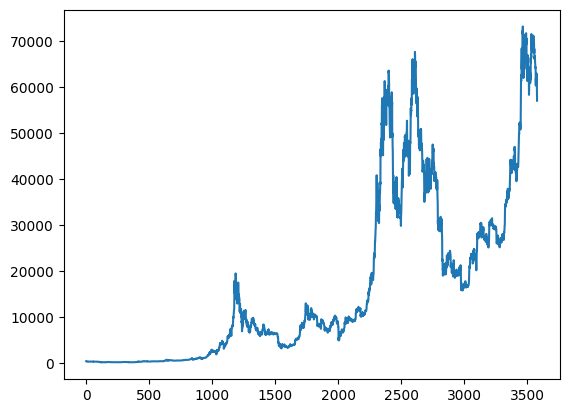

In [ ]:
plt.plot(df['Close'])

In [ ]:
ma100 = df.Close.rolling(100).mean()
print(ma100)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3574    65990.263281
3575    65978.161055
3576    65926.109492
3577    65828.260586
3578    65698.159258
Name: Close, Length: 3579, dtype: float64


In [ ]:
ma200= df.Close.rolling(200).mean()
print(ma200)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3574    58114.140859
3575    58213.280898
3576    58313.777188
3577    58403.446211
3578    58481.511406
Name: Close, Length: 3579, dtype: float64


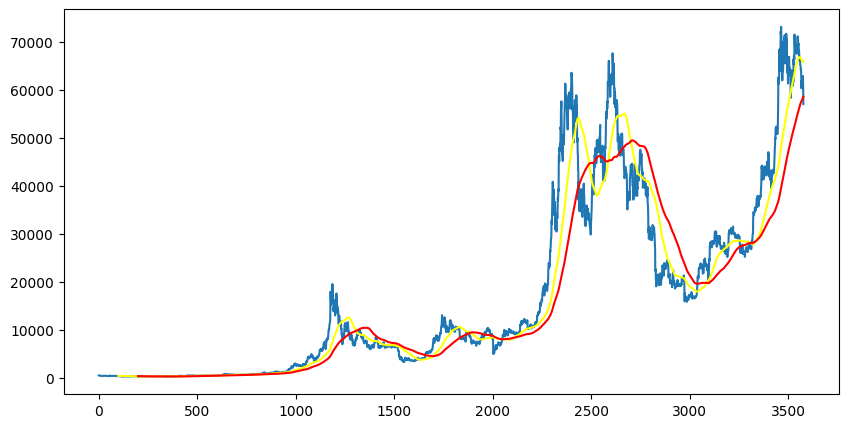

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(df.Close)
plt.plot(ma100 , color = 'yellow')
plt.plot(ma200 , color = 'red')

plt.show()

In [ ]:
#spltting data into train test
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(' training ', data_training.shape)
print(' testing ', data_testing.shape)

 taining  (2505, 1)
 testing  (1074, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.53871538],
       [0.55541868],
       [0.58680181]])

In [ ]:
x_train = []
y_train = []

for i in range(100 ,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML model
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50 )

Epoch 1/50
76/76 [==============================] - 30s 296ms/step - loss: 0.0119
Epoch 2/50
76/76 [==============================] - 24s 320ms/step - loss: 0.0036
Epoch 3/50
76/76 [==============================] - 24s 322ms/step - loss: 0.0035
Epoch 4/50
76/76 [==============================] - 24s 319ms/step - loss: 0.0036
Epoch 5/50
76/76 [==============================] - 23s 306ms/step - loss: 0.0040
Epoch 6/50
76/76 [==============================] - 24s 321ms/step - loss: 0.0027
Epoch 7/50
76/76 [==============================] - 25s 328ms/step - loss: 0.0024
Epoch 8/50
76/76 [==============================] - 23s 299ms/step - loss: 0.0024
Epoch 9/50
76/76 [==============================] - 24s 315ms/step - loss: 0.0024
Epoch 10/50
76/76 [==============================] - 24s 322ms/step - loss: 0.0023
Epoch 11/50
76/76 [==============================] - 24s 323ms/step - loss: 0.0024
Epoch 12/50
76/76 [==============================] - 23s 299ms/step - loss: 0.0026
Epoch 13/50
7

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
2505,39406.941406
2506,39995.906250
2507,40008.421875
2508,42235.546875
2509,41626.195312


In [ ]:
pass_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([pass_100_days, data_testing], ignore_index=True)

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.70561203],
       [0.69702651],
       [0.71009484],
       ...,
       [0.80706432],
       [0.77468707],
       [0.71890296]])

In [ ]:
input_data.shape

(1174, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test, y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1074, 100, 1)
(1074,)


In [ ]:
#make prediction

y_predicted = model.predict(x_test)

34/34 [==============================] - 5s 128ms/step


In [ ]:
y_predicted.shape

(1074, 1)

In [ ]:
y_test

array([0.41223765, 0.42251695, 0.42273538, ..., 0.80706432, 0.77468707,
       0.71890296])

In [ ]:
y_predicted

array([[0.33019748],
       [0.34418133],
       [0.3630965 ],
       ...,
       [0.8343646 ],
       [0.8370855 ],
       [0.8384926 ]], dtype=float32)

In [ ]:
scaler.scale_

array([1.74531596e-05])

In [ ]:
scale_factor = 1/0.00654697
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

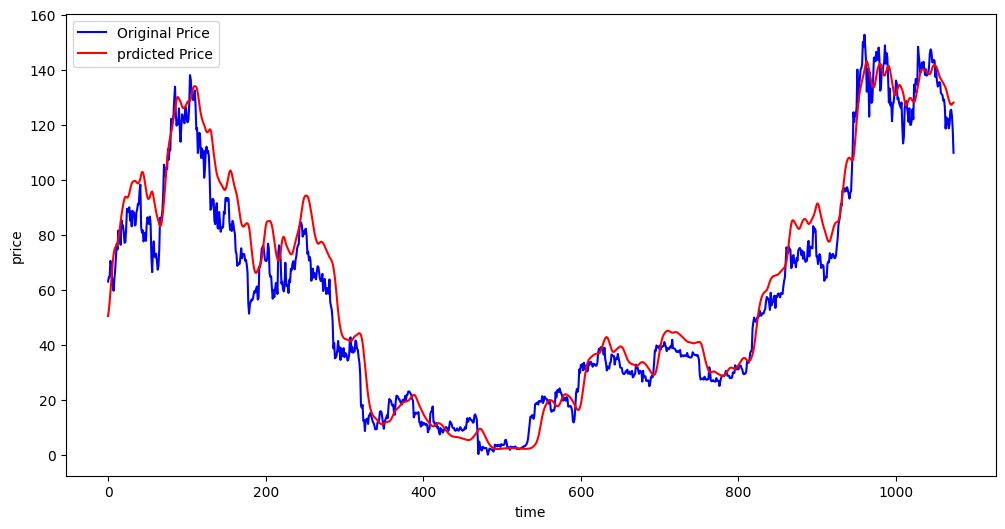

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(y_test , 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'prdicted Price')

plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 23.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tf2onnx

# Load your Keras model
model = tf.keras.models.load_model('model.h5')

# Convert the model
spec = (tf.TensorSpec((None, 100, 1), tf.float32, name="input"),)
output_path = "model.onnx"
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13)
with open(output_path, "wb") as f:
    f.write(model_proto.SerializeToString())
